### The notebook to test the model pickle file and the predict_G_storm function

In [11]:
## load the libraries
import streamlit
import pickle
import pandas as pd
from G_storm import predict_G_storm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
# Load the function from the pickle file
with open('../pickles/predict_G_storm.pkl', 'rb') as file:
    func = pickle.load(file)

##### omni = 'solar wind data csv file' sunspot = 'sunspot number csv file' all this csv files should be located in '../Data_collection/Data/'

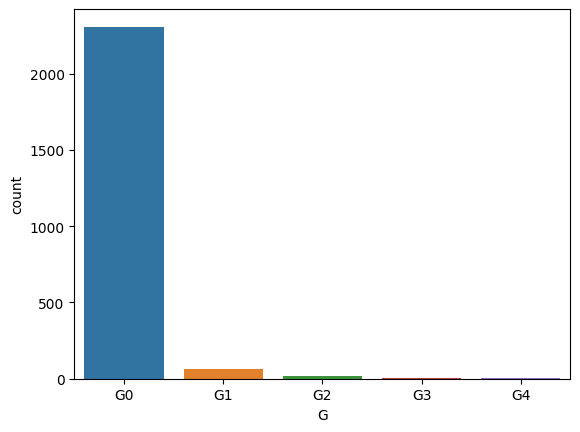

In [6]:
func(omni = 'test.csv1',sunspot= 'test_sc.csv', phase = 'rising');

##### Testing the code to predict before building the web app

In [13]:
# Assuming the number of rows is given by the user
num_rows = 1

# Fixed column names
columns = ['Wind_Category', 'Np_Category', 'B_Category', 'T_Category', 'phase','SN', 'F10.7obs']

# Create an empty dictionary to store user input data
data = {}

# Collect data for each column from the user
for column_name in columns:
    column_data = []
    for j in range(num_rows):
        value = input(f"Enter value for '{column_name}' in row {j+1}: ")
        column_data.append(value)
    data[column_name] = column_data

# Create the DataFrame using the collected data
df = pd.DataFrame(data)

Enter value for 'Wind_Category' in row 1:  fast
Enter value for 'Np_Category' in row 1:  low
Enter value for 'B_Category' in row 1:  low
Enter value for 'T_Category' in row 1:  high
Enter value for 'phase' in row 1:  rising
Enter value for 'SN' in row 1:  230
Enter value for 'F10.7obs' in row 1:  249


In [14]:
df

,Wind_Category,Np_Category,B_Category,T_Category,phase,SN,F10.7obs
0,fast,low,low,high,rising,230,249


In [15]:
### Load the saved model
loaded_model = pickle.load(open('../pickles/model.pkl', 'rb'))

In [16]:
# Columns to be One-Hot Encoded
ohe_cols = ['Wind_Category','Np_Category','B_Category','T_Category','phase']

# Columns to be passed without transformation
passthrough = ['SN', 'F10.7obs']

# Initializing the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), ohe_cols),
        ('passthrough', 'passthrough', passthrough)
    ],
    remainder='drop'  # Drops the columns that are not specified
)


# Fit and transform the data
transformed_data = preprocessor.fit_transform(df)

columns = list(preprocessor.named_transformers_['ohe'].get_feature_names_out()) + passthrough

# Convert the transformed data back to a DataFrame
test = pd.DataFrame(transformed_data, columns= columns)

test.columns = test.columns.str.lower()

train_columns = ['wind_category_extreme',
                     'wind_category_fast',
                     'wind_category_slow',
                     'np_category_extreme',
                     'np_category_high',
                     'np_category_low',
                     'b_category_extreme',
                     'b_category_high',
                     'b_category_low',
                     't_category_extreme',
                     't_category_high',
                     't_category_low',
                     'phase_declining',
                     'phase_rising',
                     'phase_solar_max',
                     'phase_solar_min',
                     'sn',
                     'f10.7obs']


columns_test = [col for col in train_columns if col not in test.columns] ## the columns that should be added to the test data

# Create a DataFrame with the new columns filled with zeros equaling the length of the dataframe that should be added to the test dataframe
columns_test_df = pd.DataFrame({col: [0] * len(test) for col in columns_test})

Test = pd.concat([test, columns_test_df], axis=1)

In [20]:
list(loaded_model.predict(Test[train_columns])) ## output is the type of the storm

['G0']

### The above code has been used to develop the web app